In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1587615642919788544  1587610974781046784  2022-11-02 01:20:40 UTC   
1  1587615642709999616  1587615642709999616  2022-11-02 01:20:40 UTC   
2  1587615633465921537  1587615633465921537  2022-11-02 01:20:38 UTC   
3  1587615622778724352  1587188841210839040  2022-11-02 01:20:35 UTC   
4  1587615618383110145  1587530505443868672  2022-11-02 01:20:34 UTC   

         date      time  timezone              user_id        username  \
0  2022-11-02  01:20:40         0  1489360629399961612    minarchistbi   
1  2022-11-02  01:20:40         0  1283506312995917825    con_interest   
2  2022-11-02  01:20:38         0  1526267292492906496    davesgifts53   
3  2022-11-02  01:20:35         0   952478092810833922  _frankwestphal   
4  2022-11-02  01:20:34         0             16635509          annenc   

                    name place  ... geo source user_rt_id user_rt retweet_id  \
0    Minarchist bisexual   NaN  ... NaN   

In [4]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [5]:
data = data[["username", "tweet", "language"]]

In [6]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [7]:
data["language"].value_counts()

en     9001
pt      411
it      161
qme      93
in       55
es       44
und      37
ru       21
qht      19
fr       19
ca       18
ro       17
de       17
ja       16
fi       11
nl        9
zh        9
th        8
pl        6
tr        6
vi        6
cs        5
hi        5
uk        4
tl        3
ko        2
cy        2
da        2
no        2
ar        2
lt        1
fa        1
bn        1
qam       1
sl        1
el        1
ht        1
Name: language, dtype: int64

In [8]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UseR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


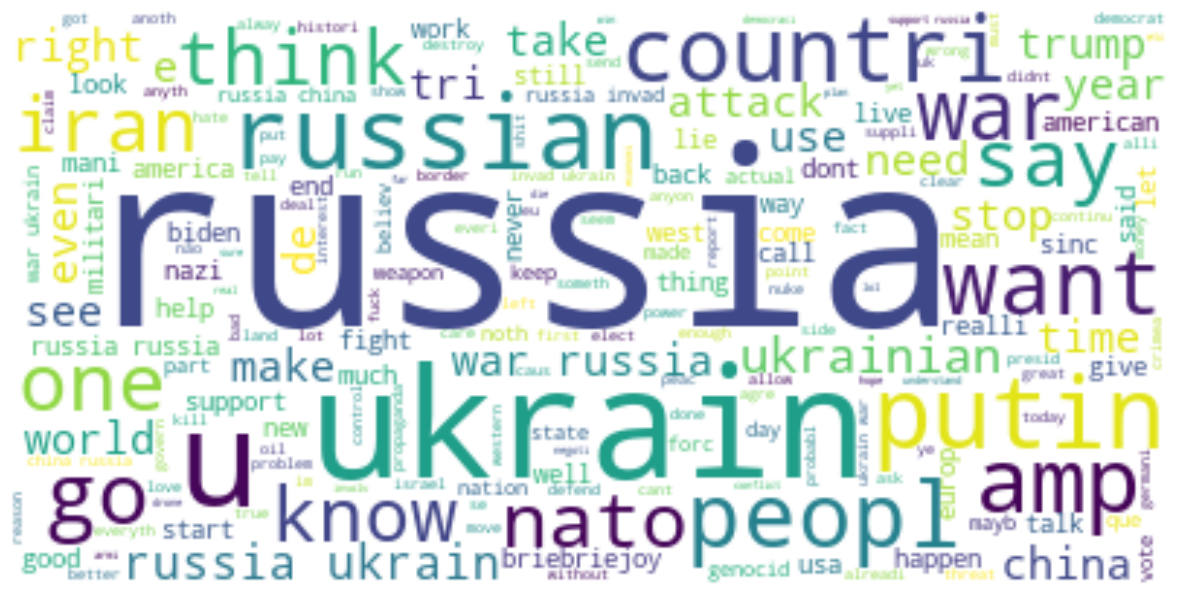

In [9]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\UseR\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0  punishednickieb i'm anti war general russia uk...     0.128     0.325   
1  new show  russia cancel grain export deal atta...     0.000     0.203   
2  republican go blame lose hous senat  russia el...     0.145     0.161   
3   mhmck russia long histori brutal seem like ke...     0.082     0.457   
4  marshablackburn lyinblackburn  trump refus ukr...     0.080     0.118   

   Neutral  
0    0.546  
1    0.797  
2    0.694  
3    0.461  
4    0.801  


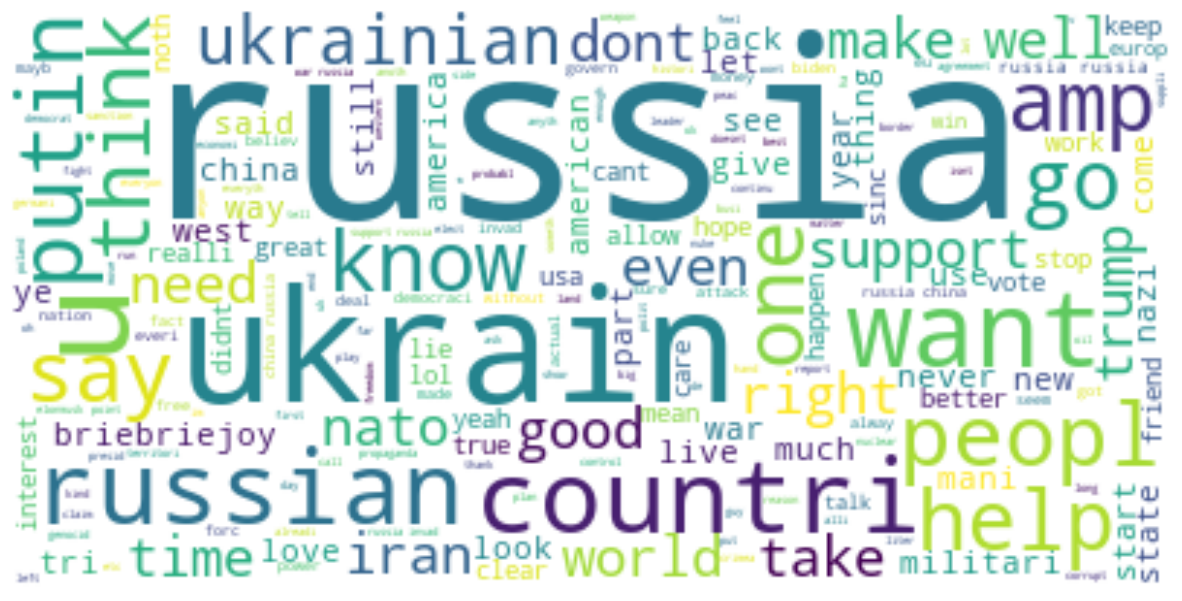

In [11]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()